In [1]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2

In [2]:
import matplotlib as mpl
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['font.family'] = 'Arial'

In [3]:
import os
import sys

src_dir = './../../src/'
sys.path[0] = src_dir

import matplotlib.pyplot as plt


import numpy as np
import pandas as pd
import seaborn as sns


from access_biology_data import properties, annotation
from access_science_shared import standardizer 

In [4]:
sys.path.append('./../src/')
from aging_tools import inout, export

from access_science_shared import standardizer, utils

In [5]:
from scipy.stats import mannwhitneyu

In [6]:
from scipy.stats import spearmanr

In [7]:
from scipy.stats import spearmanr
from natsort import natsorted

In [8]:
save_images = False

In [9]:
outfolder = '220216_takemon'

In [10]:
ref_genes = standardizer.reference_genes(10090, 'orp')

/Users/tstoeger/opt/miniconda3/envs/aging/lib/python3.7/site-packages/fastparquet/dataframe.py:5: FutureWarning: pandas.core.index is deprecated and will be removed in a future version.  The public classes are available in the top-level namespace.
  from pandas.core.index import CategoricalIndex, RangeIndex, Index, MultiIndex


In [11]:
pr = properties.genbank_validated_rna(10090)[
    ['gene_ncbi', 'Genbank_validated_RNA: full_SumACGT']
].rename(columns={
    'Genbank_validated_RNA: full_SumACGT': 'length'
})

pr.loc[:, 'log_length'] = np.log10(pr['length'])
pr = pr[pr['gene_ncbi'].isin(ref_genes)]

In [12]:
p= inout.get_internal_path(
    'datasets/general/resources/publications/takemon_2021/elife-62585-supp2-v2.csv'
)


In [13]:
df = pd.read_csv(p)

In [14]:
from access_science_shared import mapper

In [15]:
df = df[['gene.id', 'z.age.prot', 'padj.age.prot']].groupby(
    'gene.id').median().reset_index().rename(
    columns={'gene.id': 'gene_ensembl'}
)

In [16]:
df

,gene_ensembl,z.age.prot,padj.age.prot
0,ENSMUSG00000000001,1.993034,1.000000
1,ENSMUSG00000000049,0.903524,1.000000
2,ENSMUSG00000000088,-7.611730,0.005379
3,ENSMUSG00000000127,1.757345,1.000000
4,ENSMUSG00000000148,-0.057306,1.000000
...,...,...,...
6510,ENSMUSG00000115338,2.171921,1.000000
6511,ENSMUSG00000115987,-1.119506,1.000000
6512,ENSMUSG00000116138,3.071400,1.000000
6513,ENSMUSG00000116275,1.577789,1.000000


In [17]:
df = mapper.gene_ensembl_2_gene_ncbi_unambiguously(
    df, 
    10090
).reset_index()

In [18]:
d = pd.merge(df, pr)

In [19]:
d.corr('spearman')

,gene_ncbi,z.age.prot,padj.age.prot,length,log_length
gene_ncbi,1.000000,-0.095709,0.074553,0.125452,0.125452
z.age.prot,-0.095709,1.000000,0.091894,-0.127462,-0.127462
padj.age.prot,0.074553,0.091894,1.000000,0.027783,0.027783
length,0.125452,-0.127462,0.027783,1.000000,1.000000
log_length,0.125452,-0.127462,0.027783,1.000000,1.000000


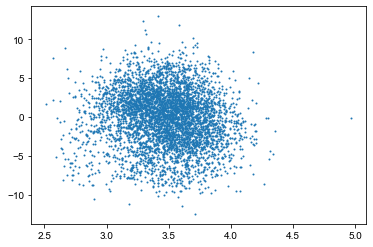

In [20]:
plt.scatter(d['log_length'], d['z.age.prot'], s=1)

In [21]:
spearmanr(d['length'], d['z.age.prot'])

SpearmanrResult(correlation=-0.1274622100056197, pvalue=1.4050141766044488e-18)

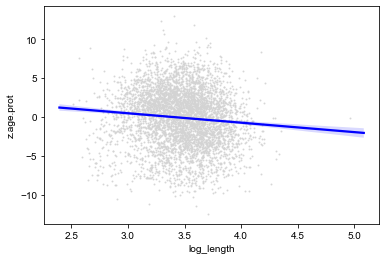

In [22]:
sns.regplot(
    x='log_length',
    y='z.age.prot',
    data=d,
#     scatter_kws={'s': 1},
    lowess=False,
    scatter_kws={"color": "lightgrey", 's': 1}, 
    line_kws={"color": "blue"}

)

if save_images:
    export.export_image(
        f'{outfolder}/proteins.pdf')




In [23]:
spearmanr(
    d['log_length'],
    d['z.age.prot']
)

SpearmanrResult(correlation=-0.1274622100056197, pvalue=1.4050141766044488e-18)

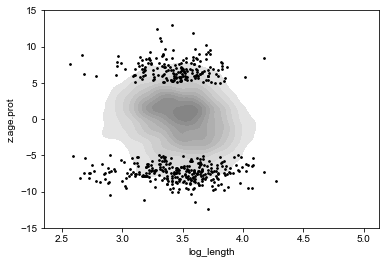

In [24]:


sns.kdeplot(
    d.loc[:, 'log_length'], d.loc[:, 'z.age.prot'], 
    color='gray',
    shade=True, shade_lowest=False)
plt.ylim([-15, 15])

f = d['padj.age.prot'] < 0.01

plt.scatter(d.loc[f, 'log_length'], d.loc[f, 'z.age.prot'], s=3, color='k')


if save_images:
    export.export_image(
        f'{outfolder}/proteome_kde.pdf')



In [25]:
d['up'] = d['z.age.prot']>0
d[f]['up'].value_counts()

False    292
True     186
Name: up, dtype: int64

In [26]:
p= inout.get_internal_path(
    'datasets/general/resources/publications/takemon_2021/elife-62585-supp1-v2.csv'
)



In [27]:
df = pd.read_csv(p).dropna(subset=['padj.age.mrna'])
# df = pd.read_csv(p)

In [28]:
df = df.rename(
    columns={'gene.id': 'gene_ensembl'}).groupby('gene_ensembl')[
    ['fc.age.mrna', 'padj.age.mrna']].median().reset_index()

In [29]:
df = mapper.gene_ensembl_2_gene_ncbi_unambiguously(
    df, 
    10090
).reset_index()

In [30]:
d = pd.merge(df, pr)

In [31]:
d

,gene_ncbi,fc.age.mrna,padj.age.mrna,length,log_length
0,14679,-0.029829,1.0,3294.0,3.517724
1,12544,0.075964,1.0,1972.5,3.295017
2,107815,-0.219411,1.0,4791.0,3.680426
3,11818,0.151670,1.0,1202.0,3.079904
4,67608,-0.051409,1.0,4426.0,3.646011
...,...,...,...,...,...
11755,66845,0.071384,1.0,484.0,2.684845
11756,17527,-0.053881,1.0,1721.0,3.235781
11757,15469,0.059091,1.0,1325.0,3.122216
11758,233033,-0.027663,1.0,4391.0,3.642563


In [32]:
spearmanr(d['length'], d['fc.age.mrna'])

SpearmanrResult(correlation=-0.1634119869470989, pvalue=3.5116305311091198e-71)

In [33]:
d.shape

(11760, 5)

In [34]:
d.corr('spearman')

,gene_ncbi,fc.age.mrna,padj.age.mrna,length,log_length
gene_ncbi,1.000000,-0.054115,0.074024,0.095362,0.095362
fc.age.mrna,-0.054115,1.000000,-0.255471,-0.163412,-0.163412
padj.age.mrna,0.074024,-0.255471,1.000000,0.017486,0.017486
length,0.095362,-0.163412,0.017486,1.000000,1.000000
log_length,0.095362,-0.163412,0.017486,1.000000,1.000000


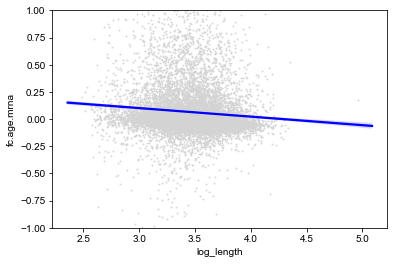

In [35]:
sns.regplot(
    x='log_length',
    y='fc.age.mrna',
    data=d,
#     scatter_kws={'s': 1},
    lowess=False,
    scatter_kws={"color": "lightgrey", 's': 1}, 
    line_kws={"color": "blue"}

)
plt.ylim([-1, 1])

if save_images:
    export.export_image(
        f'{outfolder}/transcripts.pdf')



In [36]:
f

0       False
1       False
2        True
3       False
4       False
        ...  
4722    False
4723    False
4724    False
4725    False
4726    False
Name: padj.age.prot, Length: 4727, dtype: bool

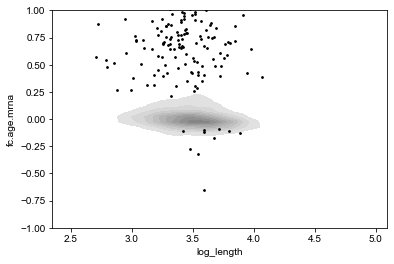

In [37]:
sns.kdeplot(
    d.loc[:, 'log_length'], d.loc[:, 'fc.age.mrna'], 
    color='gray',
    shade=True, shade_lowest=False)

f = d['padj.age.mrna'] < 0.01

plt.scatter(d.loc[f, 'log_length'], d.loc[f, 'fc.age.mrna'], s=3, color='k')




# sns.kdeplot(
#     d.loc[f, 'log_length'], d.loc[f, 'fc.age.mrna'], 
#     color='gray',
#     shade=True, shade_lowest=False)
plt.ylim([-1, 1])

if save_images:
    export.export_image(
        f'{outfolder}/transcripts_kde.pdf')



In [40]:
d['up'] = d['fc.age.mrna']>0
d[f]['up'].value_counts()

True     186
False     10
Name: up, dtype: int64